### Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_dataset.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Data Cleaning

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.drop(['show_id', 'cast', 'date_added', 'description'], inplace=True, axis=1)
df.head()

,type,title,director,country,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [7]:
df.fillna('Unknown',inplace=True,axis=1)

In [8]:
df.isnull().sum()

type            0
title           0
director        0
country         0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [9]:
df.head()

,type,title,director,country,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,Unknown,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,Unknown,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


### Data Visualization

C:\Users\usman\AppData\Local\Temp\ipykernel_21036\3598941554.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['type'], palette="pastel")


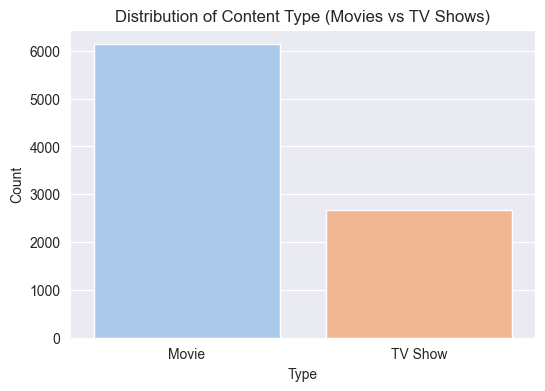

In [10]:
sns.set_style("darkgrid")

plt.figure(figsize=(6, 4))
sns.countplot(x=df['type'], palette="pastel")
plt.title("Distribution of Content Type (Movies vs TV Shows)")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

In [11]:
n_largest_titles = df['country'].value_counts().nlargest(10).index.tolist()
df['country_filtered'] = df['country'].apply(lambda x: x if x in n_largest_titles else "Other")
df.head()

,type,title,director,country,release_year,rating,duration,listed_in,country_filtered
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries,United States
1,TV Show,Blood & Water,Unknown,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Other
2,TV Show,Ganglands,Julien Leclercq,Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Unknown
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV",Unknown
4,TV Show,Kota Factory,Unknown,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",India


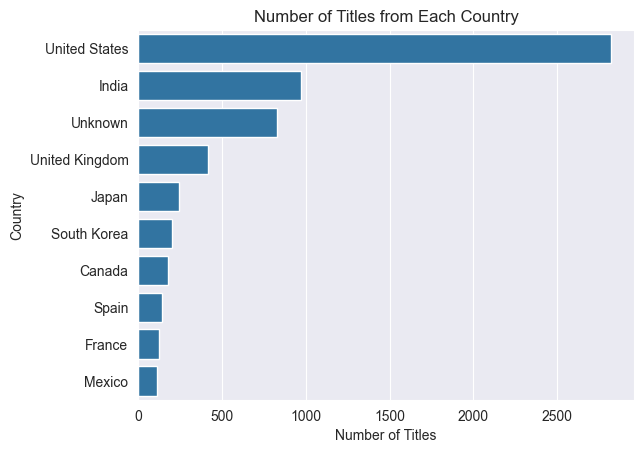

In [12]:
ax = sns.countplot(y='country_filtered', data=df.dropna(subset='country'), order=n_largest_titles)
ax.set_xlabel('Number of Titles')
ax.set_ylabel('Country')
ax.set_title('Number of Titles from Each Country');

In [13]:
df_movies = df.loc[df['type'] == 'Movie'].copy().reset_index(drop=True)
df_movies.head()

,type,title,director,country,release_year,rating,duration,listed_in,country_filtered
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries,United States
1,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Unknown,2021,PG,91 min,Children & Family Movies,Unknown
2,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Other
3,Movie,The Starling,Theodore Melfi,United States,2021,PG-13,104 min,"Comedies, Dramas",United States
4,Movie,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies",Other


In [14]:
# Checking if all the rows have the same unit (min)
df_movies.duration.str.contains('min').sum() == df_movies.dropna(subset='duration').shape[0]

np.False_

In [15]:
# Converting the durations to numbers
df_movies['duration'] = pd.to_numeric(df_movies['duration'].apply(lambda x: str(x).split()[0]), errors='coerce')
df_movies.head()

,type,title,director,country,release_year,rating,duration,listed_in,country_filtered
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90.0,Documentaries,United States
1,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Unknown,2021,PG,91.0,Children & Family Movies,Unknown
2,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies",Other
3,Movie,The Starling,Theodore Melfi,United States,2021,PG-13,104.0,"Comedies, Dramas",United States
4,Movie,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,TV-MA,127.0,"Dramas, International Movies",Other


In [16]:
# Create a new boolean column
df_movies['longer_than_90'] = df_movies['duration'] > 90

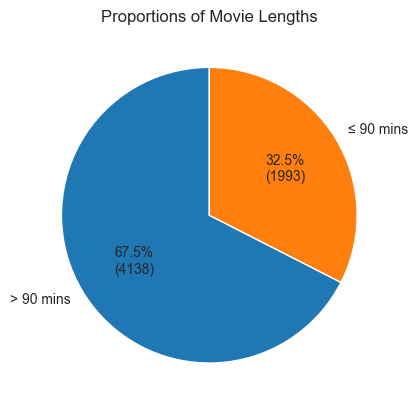

In [17]:
# Creating a function so that the chart shows the respective
def movie_autopct(pct):
    total = sum(df_movies['longer_than_90'].value_counts())
    count = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({count})'

# Plotting the chart
df_movies['longer_than_90'].value_counts().plot.pie(
    labels=['> 90 mins', '≤ 90 mins'],
    autopct=movie_autopct,
    startangle=90,
    ylabel=''
)
plt.title('Proportions of Movie Lengths')
plt.show()

In [18]:
df.head()

,type,title,director,country,release_year,rating,duration,listed_in,country_filtered
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries,United States
1,TV Show,Blood & Water,Unknown,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Other
2,TV Show,Ganglands,Julien Leclercq,Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Unknown
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV",Unknown
4,TV Show,Kota Factory,Unknown,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",India


In [19]:
# What is the shortest movie?
df_movies.sort_values(by='duration').head(10)

,type,title,director,country,release_year,rating,duration,listed_in,country_filtered,longer_than_90
2402,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",United States,2014,TV-Y,3.0,"Children & Family Movies, Sci-Fi & Fantasy",United States,False
1777,Movie,Sol Levante,Akira Saitoh,Japan,2020,TV-14,5.0,"Action & Adventure, Anime Features, Internatio...",Japan,False
972,Movie,Cops and Robbers,"Arnon Manor, Timothy Ware-Hill",United States,2020,PG-13,8.0,Dramas,United States,False
1017,Movie,Canvas,Frank E. Abney III,United States,2020,G,9.0,"Children & Family Movies, Dramas",United States,False
2276,Movie,American Factory: A Conversation with the Obamas,Unknown,United States,2019,TV-G,10.0,Documentaries,United States,False
4229,Movie,Calico Critters: A Town of Dreams,Momoko Kamiya,Unknown,2017,TV-Y,11.0,Children & Family Movies,Unknown,False
1873,Movie,Calico Critters: Everyone's Big Dream Flying i...,Momoko Kamiya,Unknown,2019,TV-Y,11.0,Children & Family Movies,Unknown,False
439,Movie,Besieged Bread,Soudade Kaadan,Unknown,2015,TV-14,12.0,"Dramas, International Movies",Unknown,False
2400,Movie,Cosmos Laundromat: First Cycle,Mathieu Auvray,Netherlands,2015,TV-MA,12.0,"Dramas, International Movies, Sci-Fi & Fantasy",Other,False
3008,Movie,Zion,Floyd Russ,United States,2018,TV-PG,12.0,"Documentaries, Sports Movies",United States,False


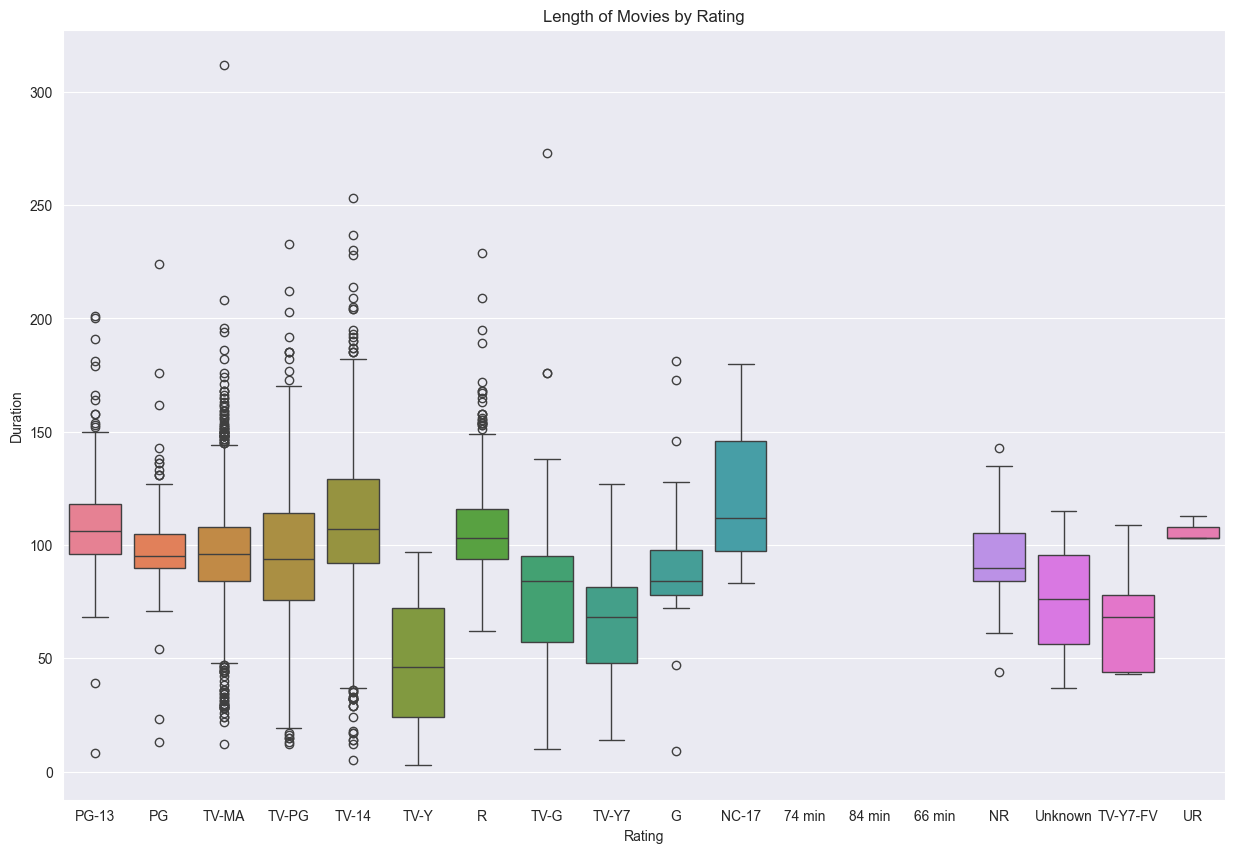

In [20]:
# Length of Movies
'''A boxplot seems appropriate to me in this scenario. 
It can show how the ratings relate to the length of the movies, while giving us valuable insights regarding the outliers.'''

plt.figure(figsize=(15, 10))
sns.boxplot(x='rating', y='duration', data=df_movies, hue='rating', palette='husl')
plt.xlabel('Rating')
plt.ylabel('Duration')
plt.title('Length of Movies by Rating');

In [21]:
# Get the count and rating into a dataframe
rating_count_ser = df.groupby('rating').duration.count()
rating_count_df = rating_count_ser.to_frame().reset_index()
rating_count_df.columns=['rating', 'duration_count']
rating_count_df

,rating,duration_count
0,66 min,1
1,74 min,1
2,84 min,1
3,G,41
4,NC-17,3
5,NR,80
6,PG,287
7,PG-13,490
8,R,799
9,TV-14,2160


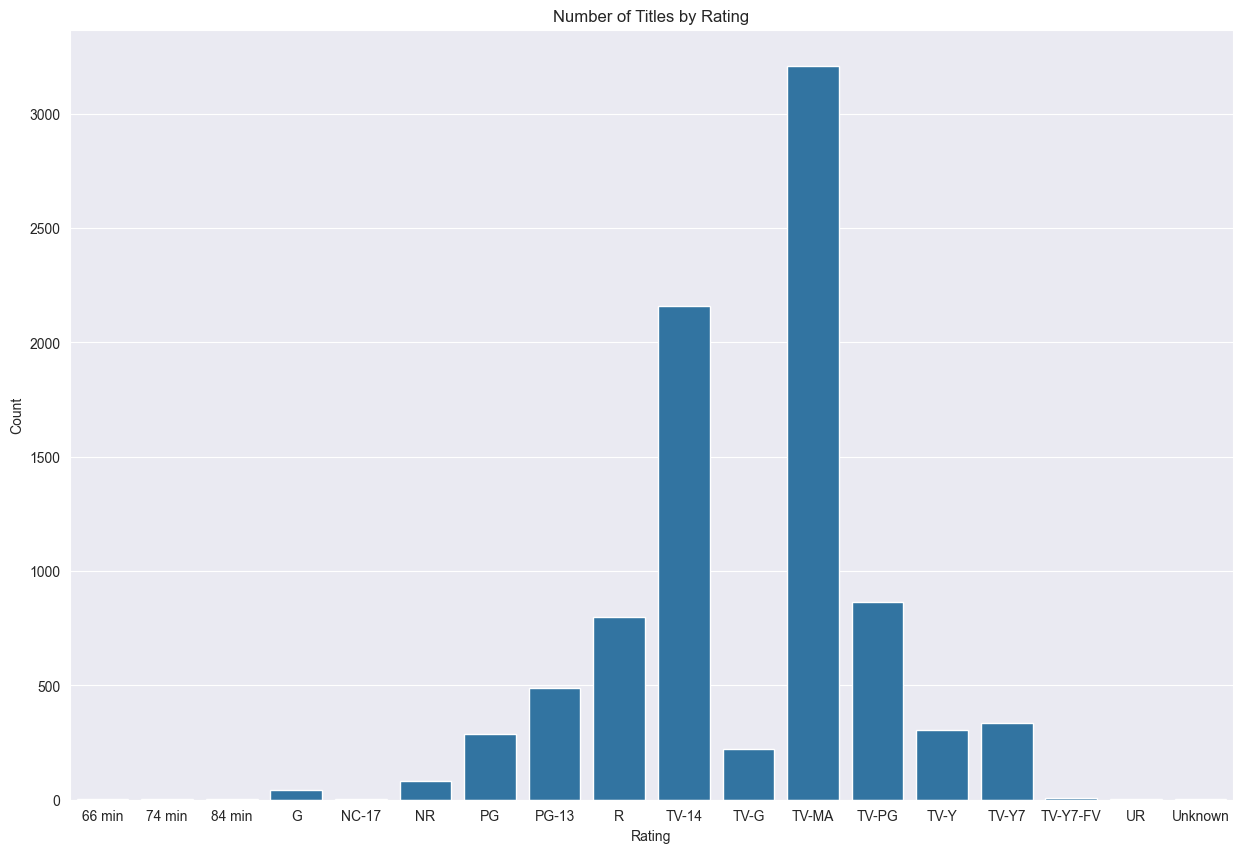

In [22]:
plt.figure(figsize=(15, 10))
sns.barplot(data=rating_count_df, x='rating', y='duration_count')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Number of Titles by Rating');